In [1]:
import pandas as pd
from sklearn import linear_model
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 1.2 Data exploration

In [42]:
df = pd.read_csv('data/train.csv',sep=',')
print(len(df))
df.head()

891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### describe()

 - Through the describe command we can see that about a third of the passengers survived. 
 - The age of the passengers ranges from below one year to 80 and the average is about 30. 
 - the fare ranges a lot, with a standard deviation of 50, and a mean of 32

In [43]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,890.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.227883
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.716342
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.903100
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## info()

- info tells us the datatypes and how many rows contain data in the different columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         890 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1.3 Data cleaning

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          687
Embarked         2
dtype: int64

## Interpolation

### Age:

The age column has in total 86 missing values, to fill the missing values we use the mean of all the other values. 

In [6]:
df['Age'] = df['Age'].replace(np.NaN,df['Age'].mean())

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          687
Embarked         2
dtype: int64

### Fare
Another numerical column that has NaN values, is fare. To fill this value we use the median of other rows based on the class of the passaneger, as this gives us a more representative fare.

In [8]:
df[df['PassengerId'] == 870]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,NaN,NaN,S


In [9]:
df['Fare'][df['Pclass'] == 3] = df['Fare'][df['Pclass'] == 3].fillna(df['Fare'][df['Pclass'] == 3].mean())
df[df['PassengerId'] == 870]

/var/folders/jj/6mz63v6n0b5f1hlgmlnwgd7r0000gn/T/ipykernel_87013/1544471023.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fare'][df['Pclass'] == 3] = df['Fare'][df['Pclass'] == 3].fillna(df['Fare'][df['Pclass'] == 3].mean())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,13.680738,NaN,S


## Categorical columns

We drop the Cabin column, as 327 out of the 418 rows do not contain any data. 

In [10]:
df = df.drop("Cabin", axis='columns')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

## Outliers

Through the describe method, we can see that the fare column has a high std, aswell as a high difference between the min and max.
This can be visualized through the use of box plots, which furthermore shows that we have outliers in this category. 

We can then remove the outliers, Which we do by class.


In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.207067
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.692288
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:title={'center':'Fare'}, xlabel='Pclass'>

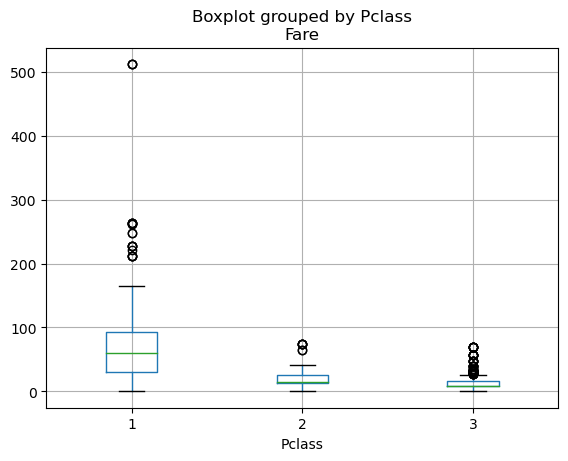

In [13]:
df.boxplot(column=['Fare'], by='Pclass')

In [14]:
for i in range(1,4):
    Q1=df[df['Pclass'] == float(i)]['Fare'].quantile(0.25)
    Q3=df[df['Pclass'] == float(i)]['Fare'].quantile(0.75)
    IQR=Q3-Q1

    threshold = 1.5

    outliers = df[df['Pclass'] == float(i)][(df['Fare'] < Q1 - threshold * IQR) | (df['Fare'] > Q3 + threshold * IQR)]

    df = df.drop(outliers.index)

/var/folders/jj/6mz63v6n0b5f1hlgmlnwgd7r0000gn/T/ipykernel_87013/787182538.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers = df[df['Pclass'] == float(i)][(df['Fare'] < Q1 - threshold * IQR) | (df['Fare'] > Q3 + threshold * IQR)]


<AxesSubplot:title={'center':'Fare'}, xlabel='Pclass'>

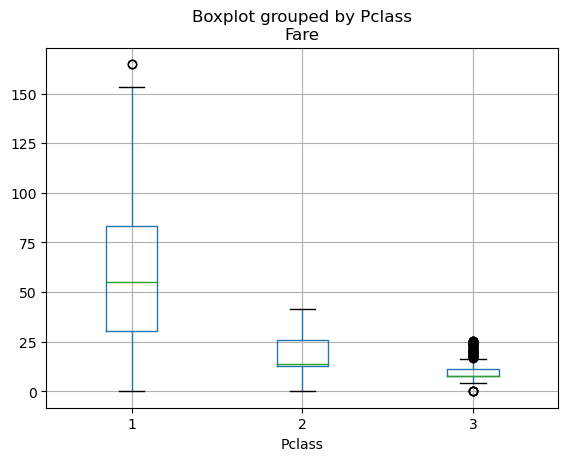

In [15]:
df.boxplot(column=['Fare'], by='Pclass')

## 1.4 Data visualization

### Categorical

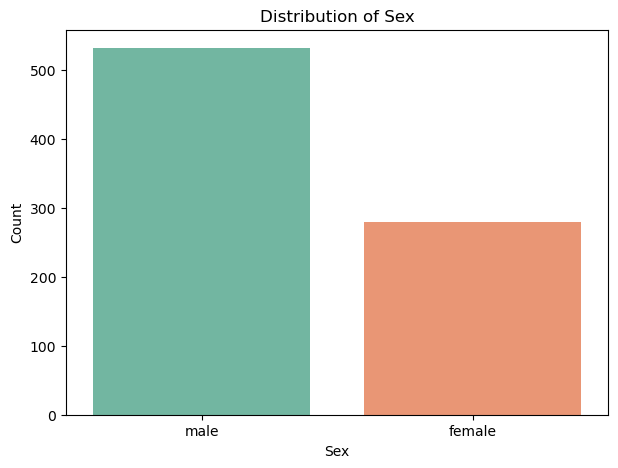

In [16]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Sex', palette='Set2')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

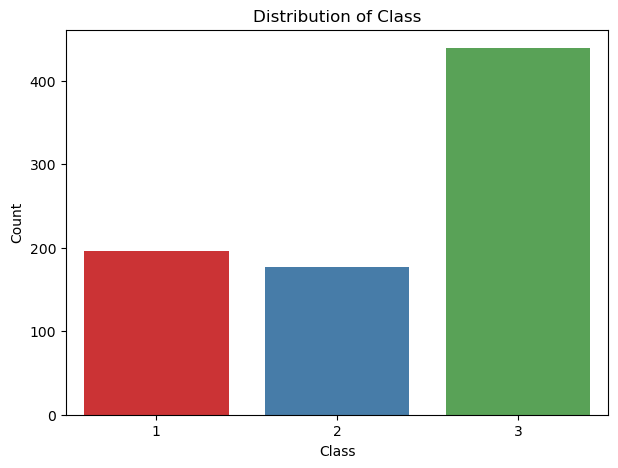

In [17]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Pclass', palette='Set1')
plt.title('Distribution of Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

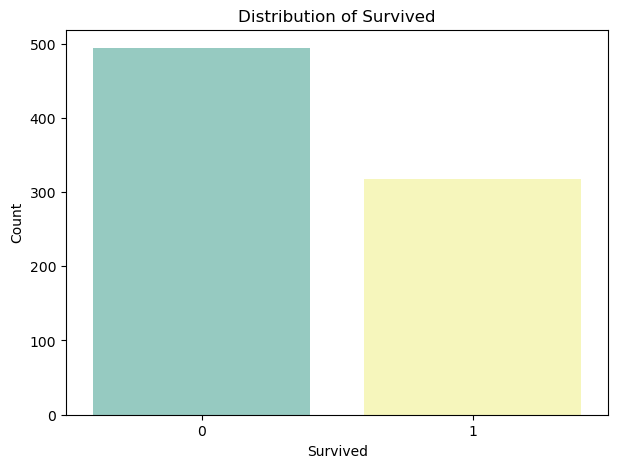

In [19]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='Survived', palette='Set3')
plt.title('Distribution of Survived')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

### Numerical

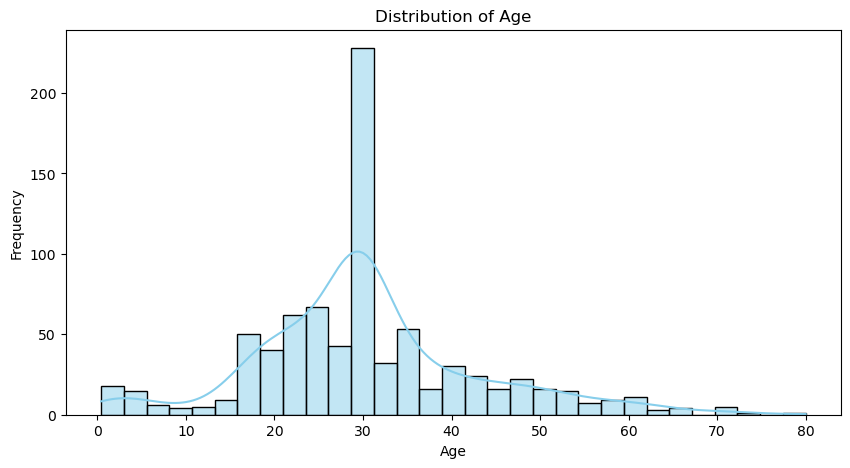

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'], kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

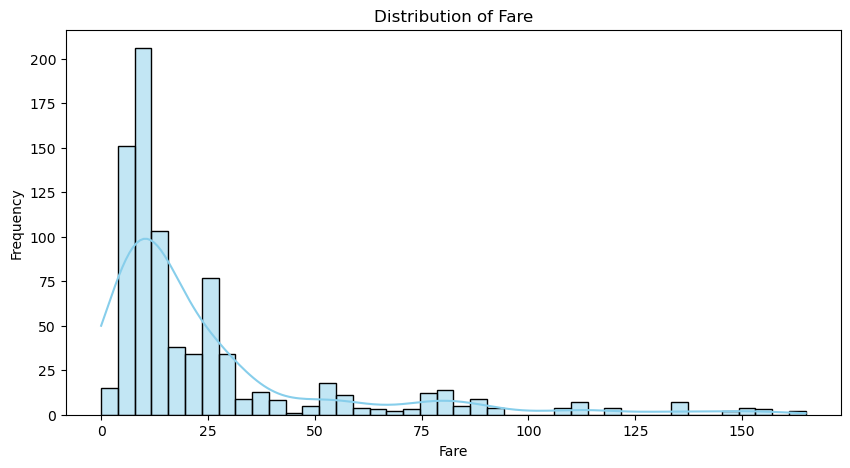

In [21]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Fare'], kde=True, color='skyblue')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Task 2: Feature Engineering and Descriptive Statistics

## 1.1 Feature Engineering

In [22]:
bins = [0, 18, 60, df['Age'].max()]
labels = ['young', 'adult', 'senior']

df['AgeCategory'] = pd.cut(df['Age'], bins, labels=labels)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeCategory
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult


In [23]:
df = pd.get_dummies(df, columns = ['Sex'])

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeCategory,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,adult,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,adult,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,adult,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,adult,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,adult,0,1


## 2.2 Descriptive Statistics:

In [25]:
print(f"Median: {df['Fare'].median()}, Standard deviation: {df['Fare'].std()}, Mean: {df['Fare'].mean()}")


Median: 13.0, Standard deviation: 29.599894223448118, Mean: 25.14283280587104


In [26]:
df['AgeCategory'].value_counts()

adult     684
young     107
senior     21
Name: AgeCategory, dtype: int64

## 3.3 Visualization

# Task 3: Data Wrangling and Analysis

## 3.1 Data Selection and Wrangling

Hypothisis: more women survived than men, chance of survival is higher for younger people and first class passengers are more likley to survive.

Predicting survivers:
    columns:
    AgeCategory,
    Sex,
    Pclass

In [27]:
df.groupby(['AgeCategory'])['Survived'].mean()

AgeCategory
young     0.607477
adult     0.362573
senior    0.238095
Name: Survived, dtype: float64

In [28]:
df.groupby(['Sex_female'])['Survived'].mean()

Sex_female
0    0.18985
1    0.77500
Name: Survived, dtype: float64

In [29]:
df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.622449
2    0.480226
3    0.252847
Name: Survived, dtype: float64

# 3.2 Data analysis

<AxesSubplot:xlabel='Fare', ylabel='Age'>

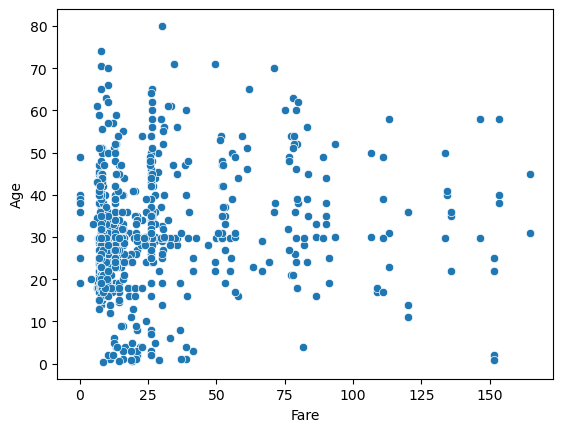

In [30]:
sns.scatterplot(data=df, x="Fare", y="Age")

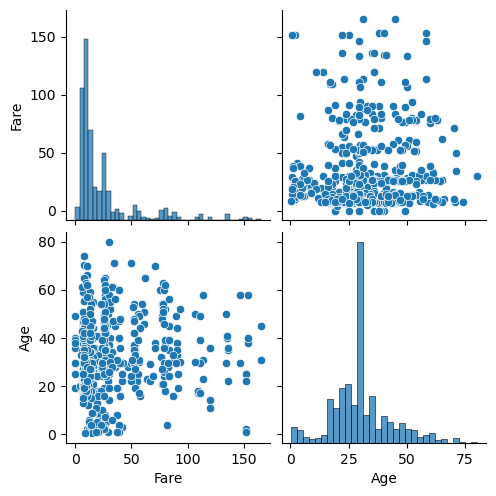

In [31]:
sns.pairplot(df[['Fare','Age']])

## Insights


- Alot more females have survived than men
- Young people have a higher chance survival
- first class had a higher survival rate than 2. class and 2. class had higer survival rate than 3. class
